## 第二部分 统计分析
流程如下：
#### 1. 分析会员的年龄构成、男女比例等基本信息
#### 2. 分析会员的总订单占比、总消费金额占比等消费情况
#### 3. 分别以季度和小时为单位，分析不同时间段会员的消费偏好

### 任务2.1 分析会员的年龄构成、男女比例等基本信息
1. 分析会员男女比例组成、男女消费比例
2. 分析会员年龄组成、不同年龄的消费情况

In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2020-07-19

@author: 豆奶
"""
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
data_c1 = pd.read_excel("../data/cumcm2018c1.xlsx")
data_c1.drop_duplicates(subset=['kh'],keep='first',inplace=True)     # 处理重复值
data_c1 = data_c1.fillna(axis=0,method='ffill')                      # 处理缺失值--填充法
print( data_c1.shape )   

(194754, 4)


In [3]:
# 获取会员的年龄
def get_age( x ):
    now = datetime.datetime.today().year
    try:
        age = now - x.year
    except:
        x = pd.to_datetime( x )
        age = now - x.year
    return age

data_c1['age'] = data_c1['csrq'].map(get_age)

In [4]:
print("异常值处理前， 所有会员中年龄最小的为：", data_c1.age.min(), "; 年龄最大的为：", data_c1.age.max() )
# 从结果可以看出，年龄有异常，把异常的年龄删除

data_c1 = data_c1.drop(data_c1[(data_c1.age < 0)].index)
data_c1 = data_c1.drop(data_c1[(data_c1.age > 100)].index)

print("异常值处理后，所有会员中年龄最小的为：", data_c1.age.min(), "; 年龄最大的为：", data_c1.age.max() )

异常值处理前， 所有会员中年龄最小的为： -7860 ; 年龄最大的为： 267
异常值处理后，所有会员中年龄最小的为： 2 ; 年龄最大的为： 100


In [5]:
# 统计各个年龄段的人数
youth = data_c1[data_c1.age<45].age.count()       # 青年定义为44岁及以下
middle = data_c1[ (data_c1.age>=45) & (data_c1.age<60) ].age.count()  # 中年定义为45至59
elder = data_c1[ data_c1.age>= 60 ].age.count()   # 老年定义为60岁以上
age_matrix = [youth, middle, elder]

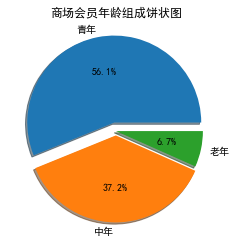

[99062, 65612, 11762]


In [6]:
labels = ['青年', '中年', '老年']
explode = (0.1, 0.05, 0)
plt.pie(age_matrix, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("商场会员年龄组成饼状图")
#plt.savefig("年龄组成饼状图.png")
plt.show()  
print(age_matrix)

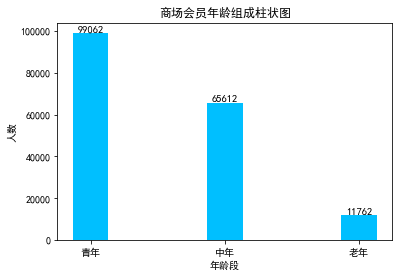

[99062, 65612, 11762]


In [7]:
# 绘制年龄组成柱状图
name_list = ['青年', '中年', '老年']
x =list(range(len(name_list)))
total_width, n = 0.8, 3
width = total_width / n

plt.bar(x, age_matrix, width=width, tick_label = name_list, fc = 'deepskyblue')
for xx, y in zip(x, age_matrix):
    plt.text(xx, y+5, '%.0f' % y, ha='center', va='bottom', fontsize=10.5)
plt.title("商场会员年龄组成柱状图")
plt.xlabel('年龄段')
plt.ylabel('人数')
#plt.savefig("年龄组成柱状图.png")
plt.show()
print(age_matrix)

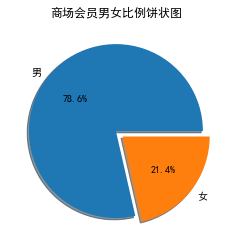

[138631, 37805]


In [8]:
# 会员性别组成
gender_list = []
man = data_c1[data_c1.xb==0].xb.count()
woman = data_c1[data_c1.xb==1].xb.count()
gender_list = [man, woman]
labels = ['男', '女']
explode = (0, 0.1)
plt.pie(gender_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("商场会员男女比例饼状图")
#plt.savefig("男女比例饼状图.png")
plt.show()  
print(gender_list)

#### 针对会员用户，统计不同年龄、性别的消费金额，并进行可视化

In [9]:
data_task1 = pd.read_csv("../data/task1.csv")
#print(data_task1.head())
data_ntask1 = data_task1[['kh', 'csrq', 'xb', 'je']]

d:\python3.7.5\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data_ntask1 = data_ntask1.dropna(axis = 0)  # 考虑到缺失值的数据为非会员，因此直接删除这部分数据
print(data_ntask1.shape)
data_ntask1.head()

(481814, 4)


,kh,csrq,xb,je
2,a37cc182,1967-02-17 00:00:00,0.0,297.07
3,a37cc182,1967-02-17 00:00:00,0.0,598.00
7,34c2dc93,1986-07-18 00:00:00,0.0,260.00
10,828aa9b4,1951-12-29 00:00:00,0.0,1288.00
11,828aa9b4,1951-12-29 00:00:00,0.0,1378.00


In [11]:
def get_age( x ):
    now = datetime.datetime.today().year
    try:
        age = now - x.year
    except:
        try:
            x = pd.to_datetime( x )
            age =  now - x.year
        except:
            return 202
    return age
data_ntask1['age'] = data_ntask1['csrq'].map(get_age)

In [12]:
print("异常值处理前， 所有会员中年龄最小的为：", data_ntask1.age.min(), "; 年龄最大的为：", data_ntask1.age.max() )
# 从结果可以看出，年龄有异常，就异常的年龄删除
data_ntask1 = data_ntask1.drop(data_ntask1[(data_ntask1.age < 0)].index)
data_ntask1 = data_ntask1.drop(data_ntask1[(data_ntask1.age > 100)].index)
print("异常值处理后，所有会员中年龄最小的为：", data_ntask1.age.min(), "; 年龄最大的为：", data_ntask1.age.max() )

异常值处理前， 所有会员中年龄最小的为： 3 ; 年龄最大的为： 267
异常值处理后，所有会员中年龄最小的为： 3 ; 年龄最大的为： 99


In [13]:
def set_aged( x ):
    # 设置年龄段
    if x<45:
        return 'Y'
    elif x>=60:
        return 'E'
    else:
        return 'M'
    return age

data_ntask1['aged'] = data_ntask1['age'].map(set_aged)
data_ntask1.head()

,kh,csrq,xb,je,age,aged
2,a37cc182,1967-02-17 00:00:00,0.0,297.07,53,M
3,a37cc182,1967-02-17 00:00:00,0.0,598.00,53,M
7,34c2dc93,1986-07-18 00:00:00,0.0,260.00,34,Y
10,828aa9b4,1951-12-29 00:00:00,0.0,1288.00,69,E
11,828aa9b4,1951-12-29 00:00:00,0.0,1378.00,69,E


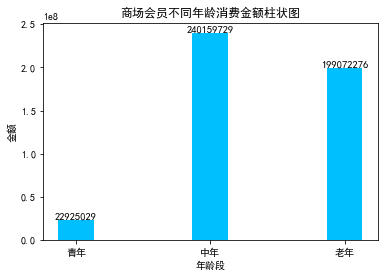

aged
E    2.292503e+07
M    2.401597e+08
Y    1.990723e+08
Name: je, dtype: float64


In [14]:
je_matrix = data_ntask1.groupby(["aged"]).sum()['je']
name_list = ['青年', '中年', '老年']
x =list(range(len(name_list)))
total_width, n = 0.8, 3
width = total_width / n

plt.bar(x, je_matrix, width=width, tick_label = name_list, fc = 'deepskyblue')
for xx, y in zip(x, je_matrix):
    plt.text(xx, y+5, '%.0f' % y, ha='center', va='bottom', fontsize=10.5)
plt.title("商场会员不同年龄消费金额柱状图")
plt.xlabel('年龄段')
plt.ylabel('金额')
#plt.savefig("不同年龄消费金额柱状图.png")
plt.show()
print(je_matrix)

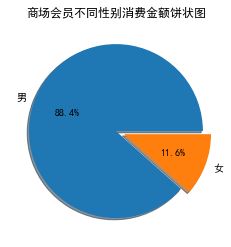

xb
0.0    4.087569e+08
1.0    5.340016e+07
Name: je, dtype: float64


In [15]:
gender_list = data_ntask1.groupby(["xb"]).sum()['je']
labels = ['男', '女']
explode = (0, 0.1)
plt.pie(gender_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("商场会员不同性别消费金额饼状图")
#plt.savefig("不同性别消费金额饼状图.png")
plt.show()  
print(gender_list)

### 任务2.2 分析会员的总订单占比、总消费金额占比等消费情况
1. 根据单据号字段，分别统计会员与非会员的订单数，并对结果可视化
2. 根据消费金额字段，分别统计会员与非会员的消费金额，并对结果可视化
3. 统计不同年份的会员消费金额，并对结果可视化
4. 按不同年份统计会员各月份消费金额，并对结果可视化

In [16]:
data_task1 = pd.read_csv("../data/task1.csv")
#print(data_task1.head())
data_ntask1 = data_task1[['kh', 'csrq', 'dtime', 'je', 'djh']]
data_ntask1.head()

,kh,csrq,dtime,je,djh
0,c68b20b4,2002-11-02 00:00:00,NaN,NaN,NaN
1,1ca15332,2002-11-02 00:00:00,NaN,NaN,NaN
2,a37cc182,1967-02-17 00:00:00,2016-09-25 10:49:14.016,297.07,7cd8
3,a37cc182,1967-02-17 00:00:00,2017-02-28 17:17:35.533,598.00,ed0a
4,2ab88539,1982-06-01 00:00:00,NaN,NaN,NaN


#### 任务2.2.1 根据单据号字段，分别统计会员与非会员的订单数，并对结果可视化
相同的单据号可能不是同一笔消费产生的，那么该不该对单据号进行去重呢

这里先按卡号分组，然后再对每一组的单据号去重

In [17]:
# 1.对缺失单据号的数据进行删除
print(data_ntask1.shape)
print('处理前缺失值数目是：\n', data_ntask1.isnull().sum())
djh_nan_idx = np.where(data_ntask1.djh.isnull())[0]   # 获取单据号为空的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
print('\n处理后缺失值数目是：\n', data_ntask1.isnull().sum())
print(data_ntask1.shape)

(1971886, 5)
处理前缺失值数目是：
 kh        986811
csrq     1341367
dtime     148705
je        148705
djh       148705
dtype: int64


d:\python3.7.5\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



处理后缺失值数目是：
 kh        986811
csrq     1341367
dtime          0
je             0
djh            0
dtype: int64
(1823181, 5)


单据号去重前数据大小： (1823181, 5) ；处理前单据号重复值数目是： 1820485
单据号去重后数据大小： (2696, 5) ；处理后单据号重复值数目是： 0
非会员的数目是： 2216


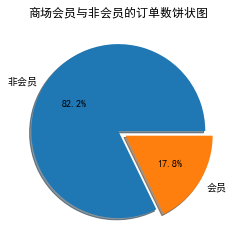

[2216, 480]


In [18]:
# 绘制订单数饼状图
# 2. 先按卡号分组, 再对单据号去重,保留第一个值
print('单据号去重前数据大小：', data_ntask1.shape, '；处理前单据号重复值数目是：', data_ntask1.djh.duplicated().sum())
# ret = data_ntask1.groupby("kh", as_index=False).apply(lambda df:df.drop_duplicates("djh"))  # 太慢 先按卡号分组, 再对单据号去重,保留第一个值
data_ntask1.reset_index(drop=True, inplace=True)   # 重设索引，并删除原来的索引值
djh_nan_idx = np.where(data_ntask1.djh.duplicated())[0]   # 获取单据号为重复的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为重复的行索引
print('单据号去重后数据大小：', data_ntask1.shape, '；处理后单据号重复值数目是：', data_ntask1.djh.duplicated().sum())

# 3. 统计会员与非会员的订单数并可视化
print( '非会员的数目是：', data_ntask1.kh.isnull().sum() )
kh_list = [data_ntask1.kh.isnull().sum(), data_ntask1.kh.notnull().sum()]

#绘图
labels = ['非会员', '会员']
explode = (0, 0.1)
plt.pie(kh_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("商场会员与非会员的订单数饼状图")
#plt.savefig("会员与非会员的订单数饼状图.png")
plt.show()  
print(kh_list)

#### 任务2.2.2 根据消费金额字段，分别统计会员与非会员的消费金额，并对结果可视化

In [20]:
data_task1 = pd.read_csv("../data/task1.csv")
#print(data_task1.head())
data_ntask1 = data_task1[['kh', 'csrq', 'dtime', 'je', 'djh']]
data_ntask1.head()

print(data_ntask1.shape)
print('处理前缺失值数目是：\n', data_ntask1.isnull().sum())
djh_nan_idx = np.where(data_ntask1.djh.isnull())[0]   # 获取单据号为空的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
print('\n处理后缺失值数目是：\n', data_ntask1.isnull().sum())
print(data_ntask1.shape)

(1971886, 5)
处理前缺失值数目是：
 kh        986811
csrq     1341367
dtime     148705
je        148705
djh       148705
dtype: int64

处理后缺失值数目是：
 kh        986811
csrq     1341367
dtime          0
je             0
djh            0
dtype: int64
(1823181, 5)


去重前数据大小： (1823181, 5) ；处理前重复值数目是： 395262


d:\python3.7.5\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


去重后数据大小： (1427919, 5) ；处理后重复值数目是： 0
非会员的数目是： 601709


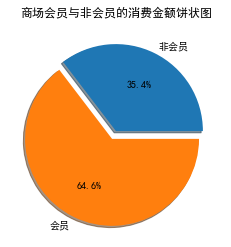

[463313680.0900001, 846089914.29]


In [21]:
# 绘制消费金额饼状图
# 去重
print('去重前数据大小：', data_ntask1.shape, '；处理前重复值数目是：', data_ntask1.duplicated().sum())
# ret = data_ntask1.groupby("kh", as_index=False).apply(lambda df:df.drop_duplicates("djh"))  # 太慢
data_ntask1.reset_index(drop=True, inplace=True)   # 重设索引，并删除原来的索引值
#djh_nan_idx = np.where(data_ntask1.duplicated())[0]   # 获取单据号为空的行索引
#data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
data_ntask1.drop_duplicates(inplace=True)
print('去重后数据大小：', data_ntask1.shape, '；处理后重复值数目是：', data_ntask1.duplicated().sum())

# 统计会员与非会员的消费金额并可视化
print( '非会员的数目是：', data_ntask1.kh.isnull().sum() )
je_list = [data_ntask1[data_ntask1.kh.isnull()].je.sum(), data_ntask1[data_ntask1.kh.notnull()].je.sum()]  # [非会员， 会员消费金额]

#绘图
labels = ['非会员', '会员']
explode = (0, 0.1)
plt.pie(je_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("商场会员与非会员的消费金额饼状图")
#plt.savefig("会员与非会员的消费金额饼状图.png")
plt.show()  
print(je_list)

#### 2.2.3统计不同年份的会员消费金额，并对结果可视化

In [22]:
data_task1 = pd.read_csv("../data/task1.csv")
#print(data_task1.head())
data_ntask1 = data_task1[['kh', 'csrq', 'dtime', 'je', 'djh']]
data_ntask1.head()

print(data_ntask1.shape)
print('处理前缺失值数目是：\n', data_ntask1.isnull().sum())
djh_nan_idx = np.where(data_ntask1.djh.isnull())[0]   # 获取单据号为空的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
print('\n处理后缺失值数目是：\n', data_ntask1.isnull().sum())
print(data_ntask1.shape)

(1971886, 5)
处理前缺失值数目是：
 kh        986811
csrq     1341367
dtime     148705
je        148705
djh       148705
dtype: int64

处理后缺失值数目是：
 kh        986811
csrq     1341367
dtime          0
je             0
djh            0
dtype: int64
(1823181, 5)


d:\python3.7.5\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


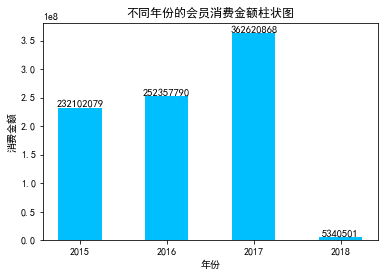

dtime
2015    2.321021e+08
2016    2.523578e+08
2017    3.626209e+08
2018    5.340501e+06
Name: je, dtype: float64


In [23]:
# 3. 统计不同年份的会员消费金额，并对结果可视化
data_ntask1['dtime'] = pd.to_datetime(data_ntask1['dtime'],infer_datetime_format=True) # 将年份转为datatime格式 
year_je = data_ntask1[data_ntask1.kh.notnull()].groupby([data_ntask1['dtime'].dt.year]).je.sum()  # 

name_list = ['2015', '2016', '2017', '2018']
x =list(range(len(name_list)))
total_width, n = 1, 2
width = total_width / n

# 绘图
plt.bar(x, year_je, width=width, tick_label = name_list, fc = 'deepskyblue')
for xx, yy in zip(x, year_je):
    plt.text(xx, yy+5, '%.0f' % yy, ha='center', va='bottom', fontsize=10.5)
plt.title("不同年份的会员消费金额柱状图")
plt.xlabel('年份')
plt.ylabel('消费金额')
#plt.savefig("不同年份的会员消费金额柱状图.png")
plt.show()
print(year_je)

#### 2.2.4 按不同年份统计会员各月份消费金额，并对结果可视化

In [24]:
data_task1 = pd.read_csv("../data/task1.csv")
#print(data_task1.head())
data_ntask1 = data_task1[['kh', 'dtime', 'je', 'djh']]
data_ntask1.head()

print(data_ntask1.shape)
print('处理前缺失值数目是：\n', data_ntask1.isnull().sum())
djh_nan_idx = np.where(data_ntask1.djh.isnull())[0]   # 获取单据号为空的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
print('\n处理后缺失值数目是：\n', data_ntask1.isnull().sum())
print(data_ntask1.shape)
data_ntask1['dtime'] = pd.to_datetime(data_ntask1['dtime'],infer_datetime_format=True, format="%m/%y") # 将年份转为datatime格式 
member = data_ntask1[data_ntask1.kh.notnull()]  #  提取会员信息
member.head()

(1971886, 4)
处理前缺失值数目是：
 kh       986811
dtime    148705
je       148705
djh      148705
dtype: int64

处理后缺失值数目是：
 kh       986811
dtime         0
je            0
djh           0
dtype: int64
(1823181, 4)


d:\python3.7.5\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [25]:
#year_je = member.groupby([member['dtime'].dt.year, data_ntask1['dtime'].dt.month]).je.sum().to_period('M')  # 
#year_je = member.groupby(member['dtime']).je.sum()
year_2015 = member[member['dtime'].dt.year==2015].groupby([member['dtime'].dt.month]).je.sum()
year_2016 = member[member['dtime'].dt.year==2016].groupby([member['dtime'].dt.month]).je.sum()
year_2017 = member[member['dtime'].dt.year==2017].groupby([member['dtime'].dt.month]).je.sum()
year_2015[9] = 0
year_2015[10] = 0
year_2015[11] = 0
year_2016[2] = 0
year_2015.sort_index(inplace=True)   # 按索引排序
year_2016.sort_index(inplace=True) 

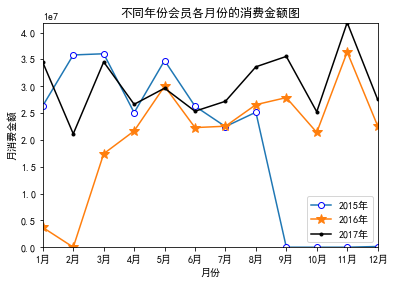

In [26]:
names = range(1,13)
names = [str(x)+'月' for x in list(names)]
x = range(len(year_2017))
plt.plot(x, year_2015, marker='o', mec='b', mfc='w',label='2015年')
plt.plot(x, year_2016, marker='*', ms=10,label='2016年')
plt.plot(x, year_2017, color='black',marker='.', label='2017年')
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=1)
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('月份') #X轴标签
plt.ylabel("月消费金额") #Y轴标签
plt.title('不同年份会员各月份的消费金额图')
plt.savefig("不同年份会员各月份的消费金额图.png")
plt.show()

### task2.3 分别以季度和小时为单位，分析不同时间段会员的消费偏好
1. 根据会员消费时间，将一天分为：早上，中午，下午，晚上，凌晨五个时间段，统计每个时段的会员人数，并对结果可视化
2. 根据会员消费时间，按年份统计每个季节的消费人数，并对结果可视化

考虑到单据号是可重复的，而会员也可多次购买，因此不能通过简单的去重来获取会员人数，因此，转而通过统计消费时间的不同来统计会员人数

In [28]:
data_task1 = pd.read_csv("../data/task1.csv")
data_ntask1 = data_task1[['kh', 'dtime', 'je', 'djh']]
#data_ntask1.head()

print(data_ntask1.shape)
print('处理前缺失值数目是：\n', data_ntask1.isnull().sum())
djh_nan_idx = np.where(data_ntask1.djh.isnull())[0]   # 获取单据号为空的行索引
data_ntask1.drop(djh_nan_idx, inplace=True)          #  删除单据号为空的行索引
print('\n处理后缺失值数目是：\n', data_ntask1.isnull().sum())
print(data_ntask1.shape)
data_ntask1['dtime'] = pd.to_datetime(data_ntask1['dtime'],infer_datetime_format=True) # 将年份转为datatime格式 
member = data_ntask1[data_ntask1['kh'].notnull()]  #  提取会员信息

(1971886, 4)
处理前缺失值数目是：
 kh       986811
dtime    148705
je       148705
djh      148705
dtype: int64

处理后缺失值数目是：
 kh       986811
dtime         0
je            0
djh           0
dtype: int64
(1823181, 4)


d:\python3.7.5\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
# 根据会员消费时间，将一天分为：早上，中午，下午，晚上，凌晨五个时间段，统计每个时段的会员人数，
# 早上（6-11）；中午（11-13）；下午（13-18）；晚上（18-1）；凌晨（1-6）
# 使用单据号来统计会员人数，因为若直接使用卡号，则不同天数的会员会被当成一天来合并，因此，采用单据号来合并
time_1 = datetime.datetime.strptime('1:00','%H:%M').time()
time_6 = datetime.datetime.strptime('6:00','%H:%M').time()
time_11 = datetime.datetime.strptime('11:00','%H:%M').time()
time_13 = datetime.datetime.strptime('13:00','%H:%M').time()
time_18 = datetime.datetime.strptime('18:00','%H:%M').time()
early_morn = member[ (member.dtime.dt.time > time_1) & (member.dtime.dt.time <= time_6) ].dtime.unique().shape[0]
morn =  member[ (member.dtime.dt.time >=time_6) & (member.dtime.dt.time <= time_11) ].dtime.unique().shape[0]
noon = member[ (member.dtime.dt.time > time_11) & (member.dtime.dt.time <= time_13) ].dtime.unique().shape[0]
afternoon = member[ (member.dtime.dt.time > time_13) & (member.dtime.dt.time <= time_18) ].dtime.unique().shape[0] 
evening = member[ (member.dtime.dt.time > time_18) | (member.dtime.dt.time <= time_1) ].dtime.unique().shape[0]
time_group = [early_morn, morn, noon, afternoon, evening]
print(time_group)  

[16, 13551, 60575, 226874, 133992]


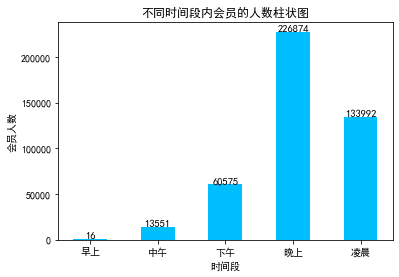

[16, 13551, 60575, 226874, 133992]


In [30]:
name_list = ['早上', '中午', '下午', '晚上', '凌晨']
x =list(range(len(name_list)))
total_width, n = 1, 2
width = total_width / n

# 绘图
plt.bar(x, time_group, width=width, tick_label = name_list, fc = 'deepskyblue')
for xx, yy in zip(x, time_group):
    plt.text(xx, yy+5, '%.0f' % yy, ha='center', va='bottom', fontsize=10.5)
plt.title("不同时间段内会员的人数柱状图")
plt.xlabel('时间段')
plt.ylabel('会员人数')
#plt.savefig("不同时间段内会员的人数柱状图.png")
plt.show()
print(time_group)

#### task 2.3.2 根据会员消费时间，按年份统计每个季节的消费人数，并对结果可视化

In [31]:
print(member.shape)
member.reset_index(drop=True, inplace=True)   # 重设索引，并删除原来的索引值
dtime_idx = np.where(member.dtime.duplicated())[0]   # 获取消费时间为重复的行索引
member.drop(dtime_idx, inplace=True)          #  删除消费时间为重复的行索引
member = member.set_index(["dtime"], drop=False)
print(member.shape)
season_data = member.resample('Q').dtime.count().to_period('Q')
print(season_data)

(836370, 4)
(435008, 4)
dtime
2015Q1    49975
2015Q2    45132
2015Q3    25015
2015Q4       69
2016Q1    12806
2016Q2    38611
2016Q3    37824
2016Q4    41906
2017Q1    45157
2017Q2    42227
2017Q3    47825
2017Q4    46633
2018Q1     1828
Freq: Q-DEC, Name: dtime, dtype: int64


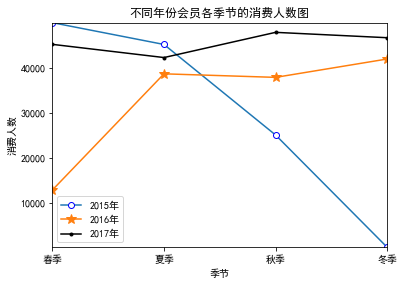

In [33]:
names = ['春季', '夏季', '秋季', '冬季']
x = range(4)
plt.plot(x, season_data[ :4], marker='o', mec='b', mfc='w',label='2015年')
plt.plot(x, season_data[4:8], marker='*', ms=10,label='2016年')
plt.plot(x, season_data[8:12], color='black',marker='.', label='2017年')
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=1)
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('季节') #X轴标签
plt.ylabel("消费人数") #Y轴标签
plt.title('不同年份会员各季节的消费人数图')
#plt.savefig("不同年份会员各季节的消费人数图.png")
plt.show()